In [1]:
import pandas as pd
import plotly.express as px
import plotly as pt
import streamlit as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    'C:/Users/Tina/Documents/TripleTen/PythonScripts/CarSalesAd/vehicles_us.csv')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# Review data and clean

# fill in NA values of model_year column with 'unkown'
df['model_year'].fillna(0, inplace=True)

# fill in NA values of cylinders column with 'unkown'
df['cylinders'].fillna(0, inplace=True)


# ill in NA values of odometer column with 'unkown'
# df['odometer'].fillna(0,inplace=True)
# Other quantified data minimum is not 0 so we can identify, but odometer min value is already 0.

# fill in NA values of paint_color column with 'unkown'
df['paint_color'].fillna('unkown', inplace=True)

# fill in NA values of is_4wd column with '2'
df['is_4wd'].fillna(2.0, inplace=True)

# check missing values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


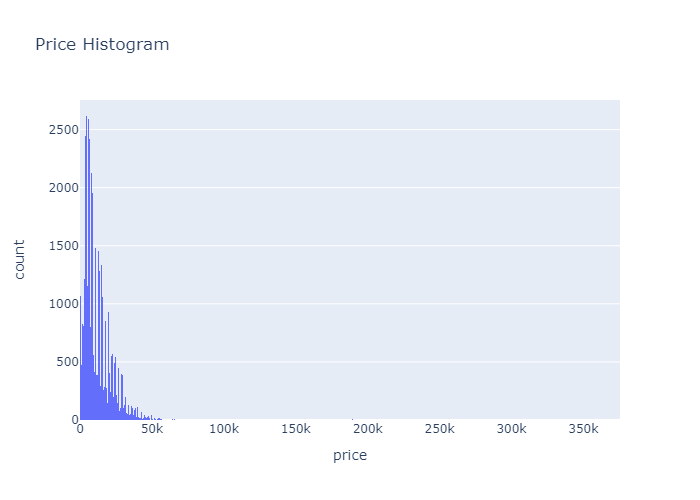

In [6]:
# Create visualization of price
price_hist = px.histogram(df, x='price', title='Price Histogram')
price_hist.show("png", engine="kaleido")

 <div class="alert alert-info"> Above is histogram of Price Distribution. Most expensive vehicle is \$375,000, least expensive vehicle is \$1, average price of vehicles is \$12,132.46, and median price of vehicles is \$9,000.

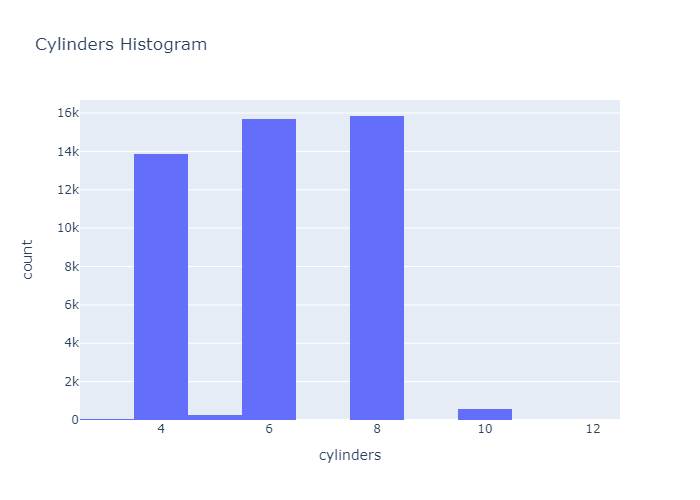

Number of vehicles missing cylinder information 51525


In [7]:
# filter out cylinder =0
cylinder_nzero = df[df['cylinders'] != 0]

# Create visualization of Cylinders
cyl_hist = px.histogram(cylinder_nzero, x='cylinders',
                        title='Cylinders Histogram')
cyl_hist.show("png", engine="kaleido")
print('Number of vehicles missing cylinder information',
      (df['cylinders'] == 0).count())

 <div class="alert alert-info"> Above shows distribution of cylinder types of vehicles. Please note that 51,525 vehicle cylinder information is missing and is excluded from the analysis. Maximum number of cylinder of all vehicles is 12, minimum is 3, average is 6.12, and the median is 6

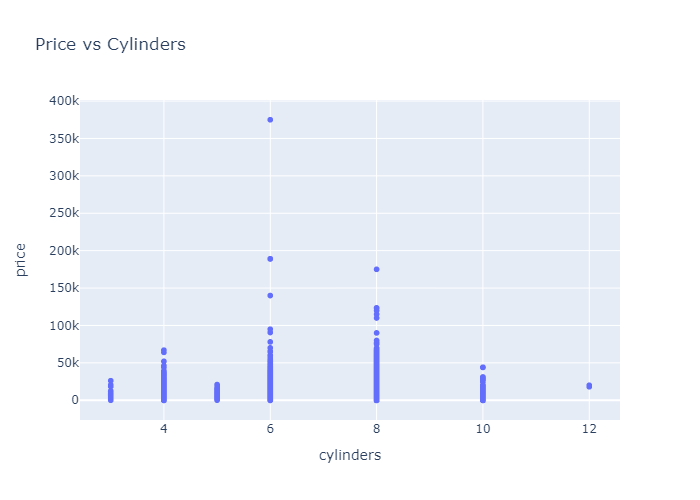

           Median Price    Mean Price  Min Price  Max Price
cylinders                                                  
3.0              7850.0   8571.911765          1      26124
4.0              6900.0   7889.494374          1      67000
5.0              6350.0   6602.915441         69      20990
6.0              9496.5  12401.902484          1     375000
8.0             13900.0  15881.309455          1     175000
10.0                1.0   7237.244080          1      43999
12.0            19000.0  19000.000000      18000      20000

Number of vehicles missing cylinder information: 51525


In [8]:
# Use Plotly Express to create scatter plots of price vs cylinder
price_cyl_sca = px.scatter(
    cylinder_nzero, x='cylinders', y='price', title='Price vs Cylinders')

# Show the scatter plots
price_cyl_sca.show("png", engine="kaleido")

# Create pivot table
price_cyl_piv = cylinder_nzero.pivot_table(
    index='cylinders', values='price', aggfunc=['median', 'mean', 'min', 'max'])
# Rename the columns for clarity
price_cyl_piv.columns = ['Median Price',
                         'Mean Price', 'Min Price', 'Max Price']
print(price_cyl_piv)
print()

# print total vehciles missing cylinder information
print('Number of vehicles missing cylinder information:',
      (df['cylinders'] == 0).count())

<div class="alert alert-info">
<li>Although more cylinders usually means that vehicles have more power, max price of vehicle had 6 cylinders.
<li>12 cylinder vehicles have the highest average and median price at 19,000 dollars. </div>    

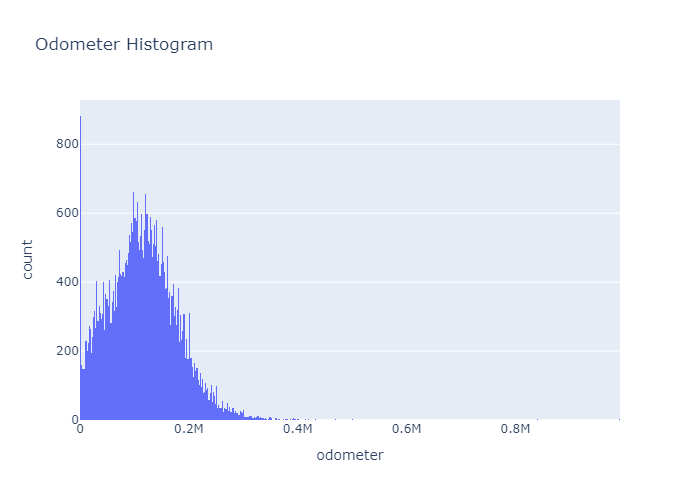

Number of vehicles missing odometer information 51525


In [9]:
# filter out missing odometer values
odo_nna = df[df['odometer'].notna()]

# Create visualization of odometers
odo_hist = px.histogram(odo_nna, x='odometer', title='Odometer Histogram')
odo_hist.show("png", engine="kaleido")

print('Number of vehicles missing odometer information',
      (df['odometer'].notna()).count())

<div class="alert alert-info">
Above shows distribution of vehicles depending on their odometer information. Please note that 51,525 vehilce cylinder information is missing and is excluded from the analysis. Maximum number of odometer reading of all vehicles is 990,000, minimum is 0, average is 15,553.46, and the median is 113,000

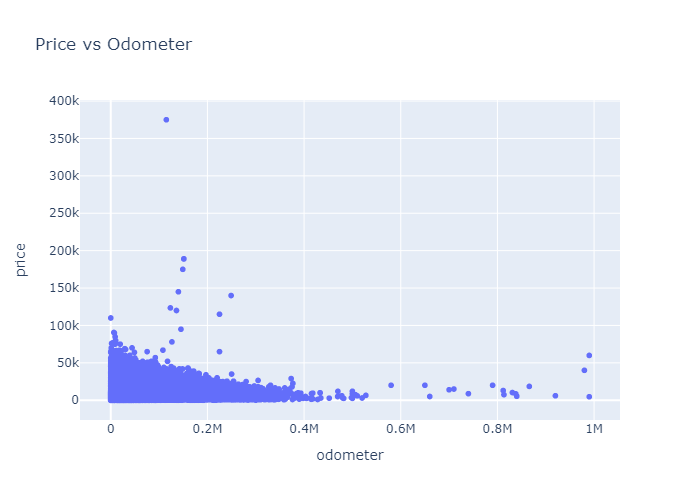

In [10]:
price_odo_sca = px.scatter(odo_nna, x='odometer',
                           y='price', title='Price vs Odometer')
price_odo_sca.show("png", engine="kaleido")

<div class="alert alert-info">
<li>Generally speaking, higher odometer reading indicats that a car has more wear and tear, which would lower the price as we can see in the general trend of the graph. 

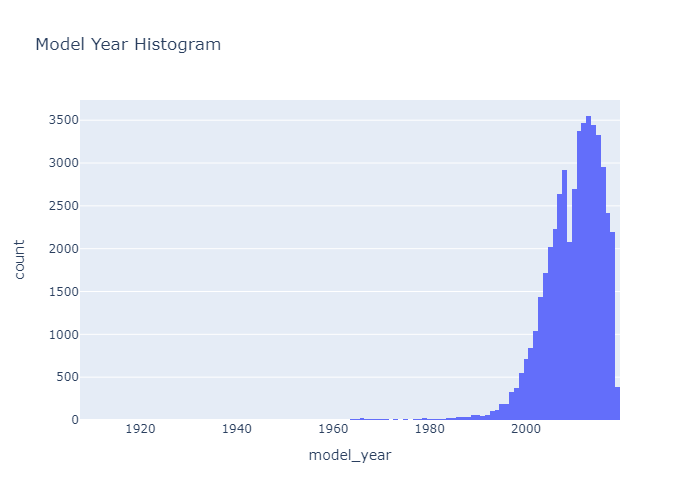

Number of vehicles missing Model Year information: 51525


In [11]:
# filter out model_year =0
model_year = df[df['model_year'] != 0]

myear_hist = px.histogram(model_year, x='model_year',
                          title="Model Year Histogram")
myear_hist.show("png", engine="kaleido")

print('Number of vehicles missing Model Year information:',
      (df['model_year'] == 0).count())

<div class="alert alert-info">
Above shows distribution of vehicles depending on their model year information. Please note that 51,525 vehicles model year information is missing and is excluded from the analysis. Most recently made vehicle is in 2019, oldest vehicle in the data set is 1908, average model year is 2009, and median for model year is 2011.

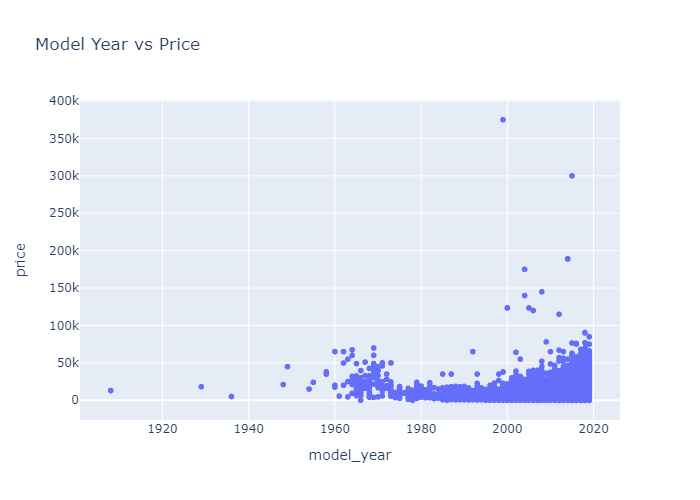

In [12]:
modyear_price_sca = px.scatter(
    model_year, x='model_year', y='price', title='Model Year vs Price')
modyear_price_sca.show("png", engine="kaleido")

<div class="alert alert-info">
<li> There are 51,525 vehicles missing Model Year information and is excluded from the analysis.
<li> Generally speaking, newer version of vehicles have more improvements which would be sold for higher price as we can see in the general trend of the Model Year vs Price.

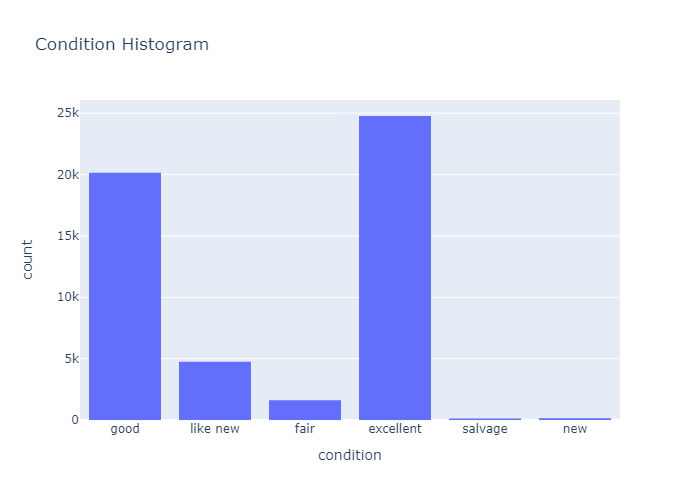

In [13]:
# User plotly express to create histograms for condition
condi_hist = px.histogram(df, x='condition', title="Condition Histogram")

condi_hist.show("png", engine="kaleido")

<div class="alert alert-info">
Majority of the vehicles are in Excellent or Good condition. There are slightly less than 5K vehicles that are Like New. There are less than 3K vehicles that are in Fair, Salvage, or New condition.

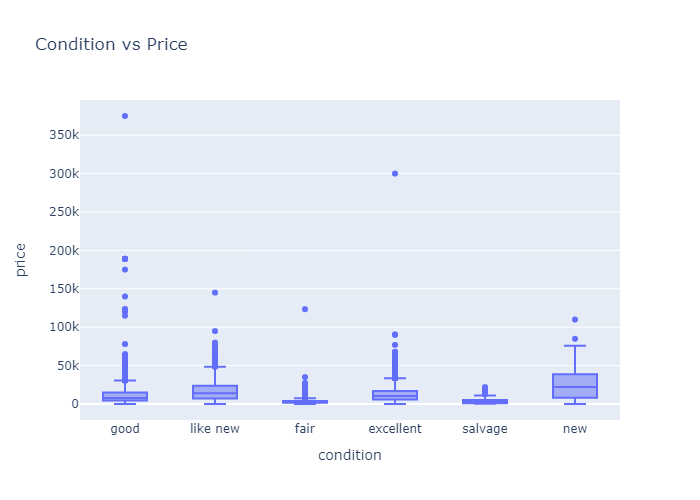

In [14]:
condi_price_sca = px.box(df, x='condition', y='price',
                         title='Condition vs Price')
condi_price_sca.show("png", engine="kaleido")

<div class="alert alert-info">
<li>Vehicle in New condition has the higest median price at 22K.
<li>Vehicle in Good condition has the highest price at 375K

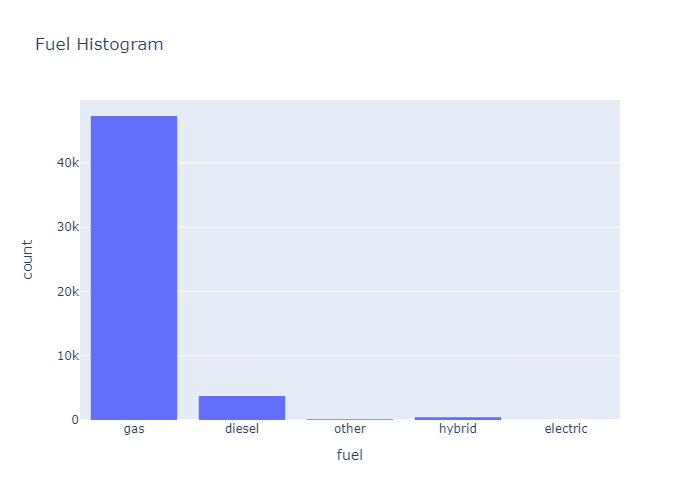

In [15]:
# User plotly express to create histograms for condition
fuel_hist = px.histogram(df, x='fuel', title="Fuel Histogram")

fuel_hist.show("png", engine="kaleido")

<div class="alert alert-info">Majority of vehicles have gas fuel type. Second commond type is diesel and Hybrid. 